# Image Restoration

In [ ]:
# Import the module from restoration
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.restoration import inpaint

defect_image = io.imread('damage.png')

mask = np.zeros(defect_image.shape[:-1])
mask[defect_image] = 1


# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
plt.imshow(restored_image)

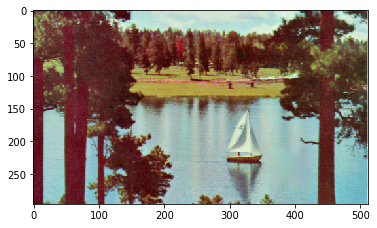

In [24]:
image_with_logo = io.imread('logo.png')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, 
                                                mask, 
                                                multichannel=True)

plt.imshow(image_with_logo)
plt.imshow(image_logo_removed)
plt.show()

## Adding Noise

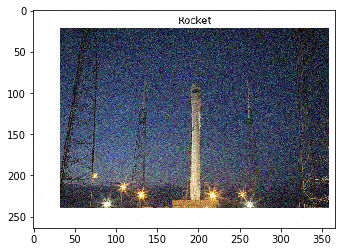

In [27]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(io.imread("rocket.png"))

# Show original and resulting image
plt.imshow(noisy_image)

## Removing Noise

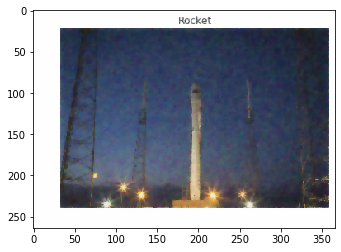

In [28]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
plt.imshow(denoised_image)

## Denoising using Bilateral Denoising

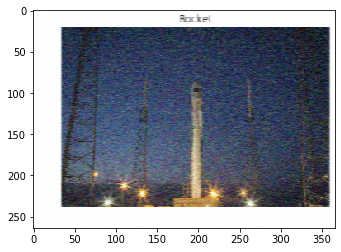

In [30]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, 
                                   multichannel=True)

plt.imshow(denoised_image)

# Image Segmentation

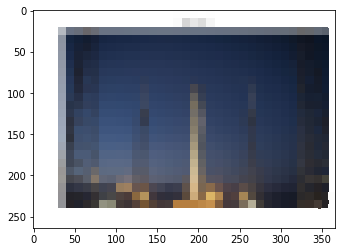

In [39]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

image = io.imread("rocket.png")

# Obtain the segmentation with 400 regions
segments = slic(image, n_segments= 1000)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, image, kind='avg')

# Show the segmented image
plt.imshow(segmented_image)

# image Contours

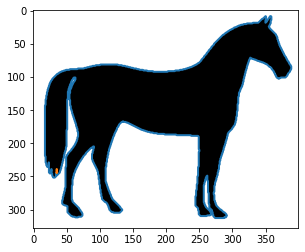

In [55]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

fig, ax = plt.subplots()
ax.imshow(horse_image, cmap="gray")

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

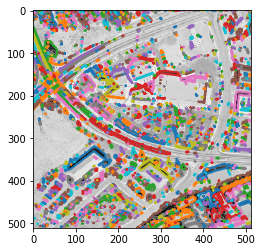

In [65]:
from skimage import color
from skimage.filters import threshold_otsu
from skimage import filters

image_dices = io.imread("ariel.png")

# Make the image grayscale
image_dices = color.rgb2gray(image_dices)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.5)

# Show the image
fig, ax = plt.subplots()
ax.imshow(image_dices, cmap="gray")

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)